In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Multiclass classification with `fashion_mnist`
Labels
Each training and test example is assigned to one of the following labels:

**Label	Description:**
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.  Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been imported for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

## Here it's training label is 9 hence it is ankle boot


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
## Check the shape of single data
train_data[0].shape,train_labels[0].shape,train_data.shape

((28, 28), (), (60000, 28, 28))

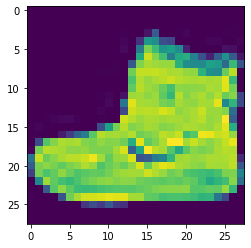

In [ ]:
## Ploting a single plot
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Checking the label for upper image
train_labels[0]

9

In [ ]:
# Creating list so that we can realted labels as human readable form
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

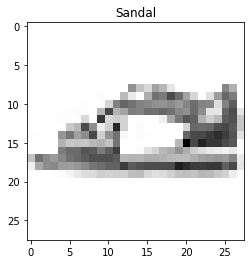

In [ ]:
# Plot an example of image and its label
plt.imshow(train_data[13],cmap=plt.cm.binary)
index=train_labels[13]
plt.title(class_names[index])

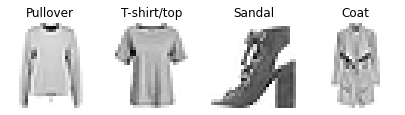

In [ ]:
# Plotting random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(1,4,i+1)
  rand_int=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_int],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_int]])
  plt.axis(False)


## Building a multiclass classification

For our multi-class classification model,we can use similar model as used previously

* input shape (28*28)
* output shape (10)
* loss fn (tf.keras.losses.CategoricalCrossentropy())
* output layer activation (softmax) not sigmoid



In [ ]:
# Here flattern changes the shape of each image from (28,28) to (None,764)
# Here the loss fn. we should use should be SparseCategoricalCrossentropy
# instead of this one.. If we need to use this one we should have our data to be one hot encoded

tf.random.set_seed(54)
model_9=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])
model_9.compile(loss="SparseCategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
non_norm_history=model_9.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

In [ ]:
# Here flattern changes the shape of each image from (28,28) to (None,764)
# Here the loss fn. we should use should be SparseCategoricalCrossentropy
# instead of this one.. If we need to use this one we should have our data to be one hot encoded

tf.random.set_seed(54)
model_10=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])
model_10.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
non_norm_history=model_10.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

# Here depth means that if our data is let's say [1,2,3] and depth =3 output =(size of input*depth)

In [ ]:
# Checking the model's summary
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checking min amd max data of training data
train_data.min(),train_data.max()

(0, 255)

### **Neural network prefer data to be scaled(or normalized) this means they are likely to have numbers between 0&1**


In [ ]:
train_data_nom=train_data/255.0
test_data_nom=test_data/255.0
train_data_nom.max(),train_data_nom.min()

(1.0, 0.0)

In [ ]:
## Now data is normalized now modelling

tf.random.set_seed(54)
model_11=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])
model_11.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
non_norm_history=model_11.fit(train_data_nom,tf.one_hot(train_labels,depth=10),epochs=25,validation_data=(test_data_nom,tf.one_hot(test_labels,depth=10)))

## In NN keep in mind that data should be in normalized form to increase the accuracy which can also be seen above

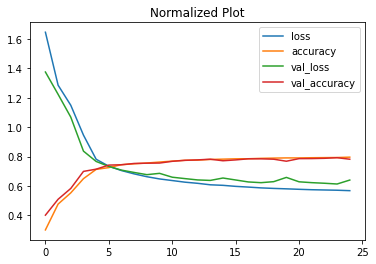

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Normalized Plot")

In [ ]:
## Finding the ideal learning rate

tf.random.set_seed(42)
model_12=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])
model_12.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10** (epochs/20))
find_lr_hist=model_12.fit(train_data_nom,tf.one_hot(train_labels,depth=10),epochs=40,validation_data=(test_data_nom,tf.one_hot(test_labels,depth=10)),callbacks=[lr_schedule])


Text(0.5, 1.0, 'Finding the ideal learning rate')

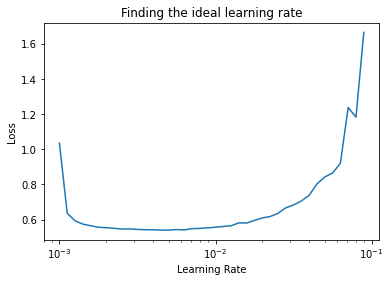

In [ ]:
import numpy as np
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_hist.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
## Finding the ideal learning rate

tf.random.set_seed(42)
model_13=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])
model_13.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
history_13=model_13.fit(train_data_nom,tf.one_hot(train_labels,depth=10),epochs=50,validation_data=(test_data_nom,tf.one_hot(test_labels,depth=10)))


In [ ]:
y_probs=model_13.predict(test_data_nom)
y_probs

array([[1.42883075e-11, 8.79150017e-11, 2.20653556e-06, ...,
        5.68293482e-02, 4.92394727e-04, 8.35720181e-01],
       [1.88243177e-06, 1.84475610e-16, 9.42313969e-01, ...,
        0.00000000e+00, 1.23464258e-03, 1.59838478e-18],
       [6.11740979e-05, 9.98460293e-01, 1.04653729e-07, ...,
        4.54603211e-17, 3.56314374e-08, 1.03026303e-11],
       ...,
       [5.96265271e-02, 3.44682690e-06, 1.07272036e-01, ...,
        1.44454890e-31, 7.20576271e-02, 2.75891618e-17],
       [8.40595112e-06, 9.97999728e-01, 1.09395401e-07, ...,
        2.99060017e-16, 9.13382792e-08, 5.70678893e-10],
       [5.11539398e-08, 2.38046773e-08, 3.84214436e-05, ...,
        7.30815111e-03, 2.72939971e-04, 4.25866805e-03]], dtype=float32)

In [ ]:
## Changing probabilities into numbers
y_preds=y_probs.argmax(axis=1)  # Axis = 1 so that 
y_preds[:15],test_labels[:15]

# Here we can seee how probability differ from original test case

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4], dtype=uint8))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=10):
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:np.newaxis]
  n_classes=cm.shape[0]  # Length of class_names

  fig,ax=plt.subplots(figsize=(10,10))
  cax=sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  plt.xticks(rotation=-45,ha="left")
  plt.yticks(rotation=-45,ha="center")
  for a,spine in cax.spines.items():   # Show black border
      spine.set_visible(True)


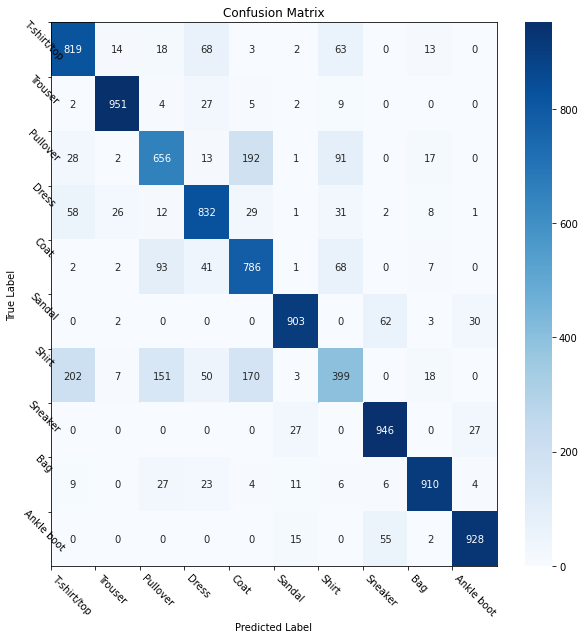

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names)

In [ ]:
import random
def plot_random_img(model,images,true_labels,classes):
  """
  Picks a random image,plot it ans labels it with a prediction and truth labels
  """
  i=random.randint(0,len(images))
  
  # Create predictions nad target
  target_img=images[i]
  pred_probs=model.predict(target_img.reshape(1,28,28))
  pred_labels=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_img,cmap="binary")

  # Change Colour of the titles depending on if the predic.. is right
  if pred_labels==true_label:
    color="green"
  else:
    color="red"
  
  # Add A xlabel
  plt.xlabel("Pred: {} [{:.2f}]% (True: {})".format(pred_labels,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
                                                 color=color)


  

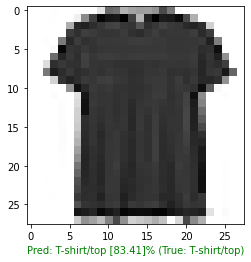

In [ ]:
plot_random_img(model=model_13,images=test_data_nom,true_labels=test_labels,classes=class_names)

## What patterns is our model learning?


In [ ]:
model_13.layers

In [ ]:
## Extract a particular layer 
model_13.layers[1]

In [ ]:
## Get the patterns of a layers in our network
weights,biases=model_13.layers[1].get_weights()

weights,weights.shape,tf.reduce_min(weights)

(array([[ 2.0415068 , -1.1884094 , -1.3611248 , -2.4212837 ],
        [ 0.5295151 , -1.5456887 , -0.755963  , -0.2851272 ],
        [ 1.6004672 , -0.61618364, -2.2084472 , -1.4376194 ],
        ...,
        [-0.10478151,  0.79469854, -0.1690665 ,  0.51664037],
        [-0.11646248,  1.4452201 ,  0.75222886, -0.65835357],
        [ 0.46175426, -0.3365653 ,  0.2037733 ,  0.31094983]],
       dtype=float32),
 (784, 4),
 <tf.Tensor: shape=(), dtype=float32, numpy=-4.7083216>)

## Now let's checkout the bias vectors

In [ ]:
# There is only one bias vector per hidden unit and 1 weight unit per data point
biases,biases.shape

(array([ 0.38960108, -0.00443142, -0.16287   ,  1.422073  ], dtype=float32),
 (4,))

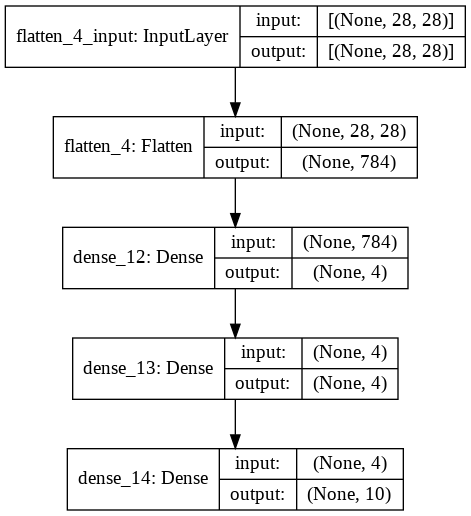

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_13,show_shapes=True)